# Ex 3: Basins of attraction

In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def q(x) :
    return x**3 - 2*x**2 - 11*x + 12

In [3]:
root = optimize.root(q,x0=-10)
print("Root found at x =",root.x)

root = optimize.root(q,x0=10)
print("Root found at x =",root.x)

root = optimize.root(q,x0=2)
print("Root found at x =",root.x)

root = optimize.root(q,x0=2.5) #just to try and see the difference
print("Root found at x =",root.x)

Root found at x = [-3.]
Root found at x = [4.]
Root found at x = [1.]
Root found at x = [-3.]


In [4]:
root, r = optimize.brentq(q, -10, 0, full_output=True)
print("Root found at x =",root,'     ( converged =',r.converged,')')
root, r = optimize.brentq(q, 0, 2, full_output=True)
print("Root found at x =",root,'     ( converged =',r.converged,')')
root, r = optimize.brentq(q, 2, 10, full_output=True)
print("Root found at x =",root,'     ( converged =',r.converged,')')

Root found at x = -3.0      ( converged = True )
Root found at x = 0.999999999999994      ( converged = True )
Root found at x = 4.000000000000002      ( converged = True )


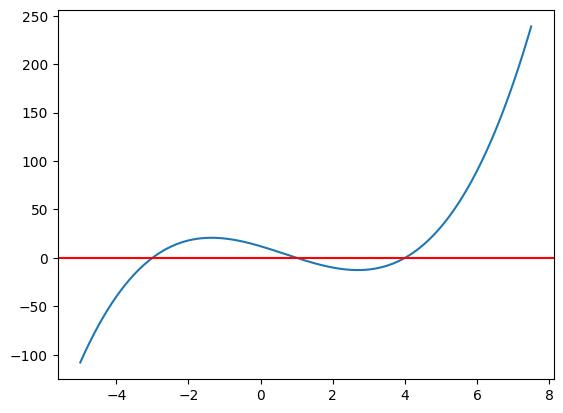

In [5]:
x = np.linspace(-5,7.5,100000)

plot = plt.figure()
plt.plot(x,q(x))
plt.axhline(0,color="red")
plt.show()

Seems like I found all the solutions

# Ex 7: Noisy signal

In [6]:
from scipy import signal

In [7]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

In [8]:
def convolve_with_gaussian(stddev) : 
    gaussian = signal.windows.gaussian(N,std=stddev)
    gaussian = gaussian / np.sum(gaussian) #normalization
    filtered_signal = signal.convolve(noisy, gaussian, mode='same') 
    
    plt.figure(figsize = (10,8))
    plt.plot(noisy,label="Noisy signal")
    plt.plot(filtered_signal,color="r",label="Filtered signal")
    plt.plot(orig,color="orange",linestyle="--",label="Original signal")
    plt.legend()
    plt.show()

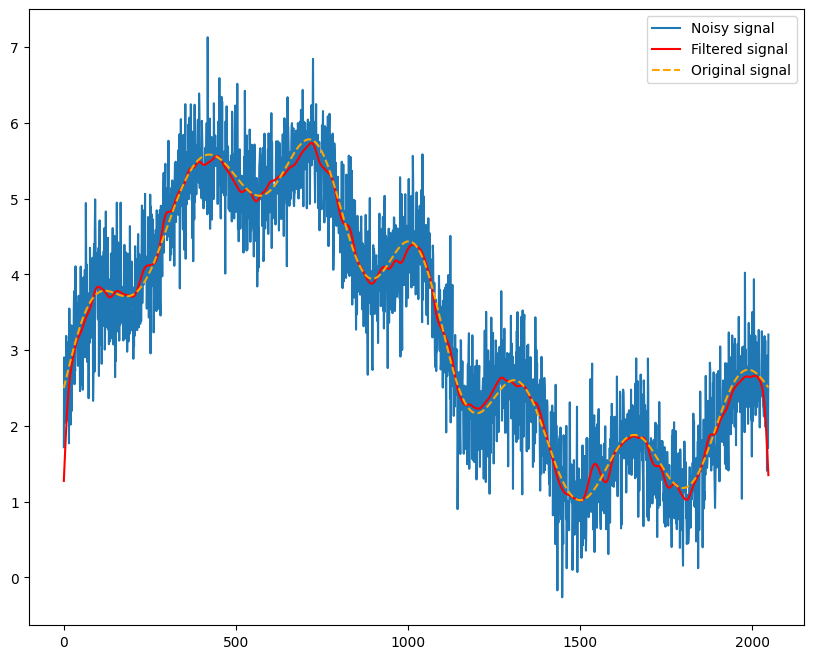

In [9]:
convolve_with_gaussian(10) #insufficient smoothing

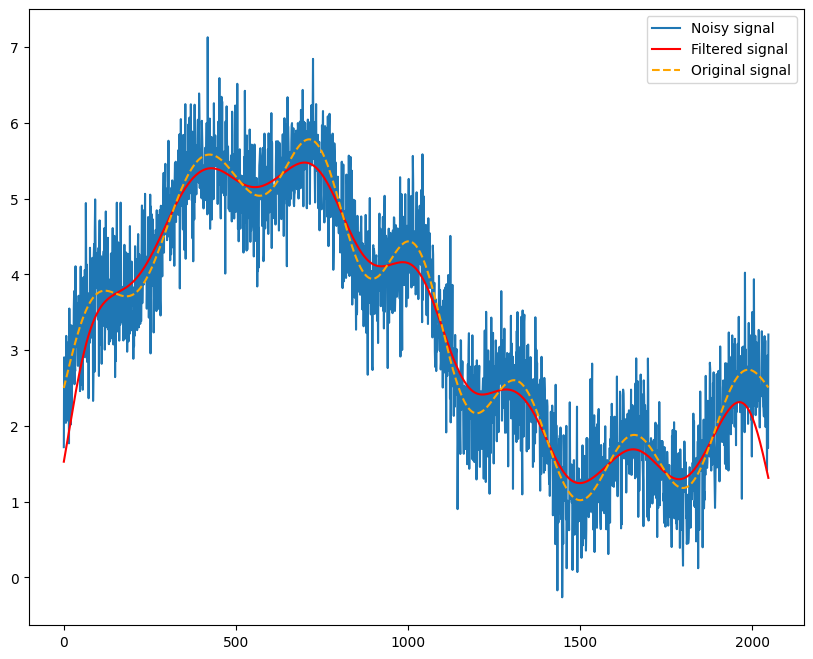

In [10]:
convolve_with_gaussian(50) #excessive smoothing

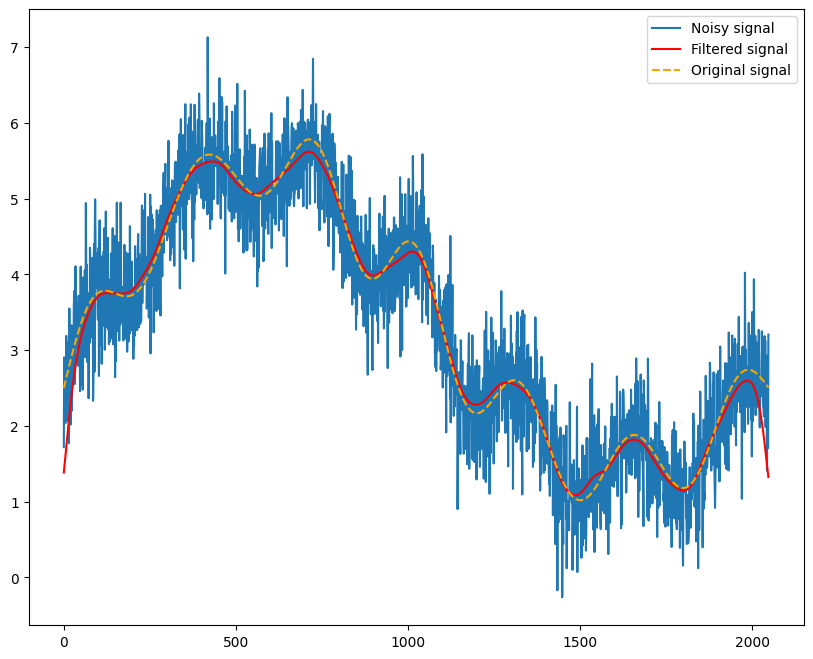

In [11]:
convolve_with_gaussian(25) #like this should be ok